In [1]:
from data_loader import DataLoader
import xgboost as xgb
import pandas as pd
import numpy as np
import os
import sys
from ml_util import *

dl = DataLoader('../data/')
x_train, x_valid, x_test, y_train, y_valid, y_test = dl.GetTrainValidTest()

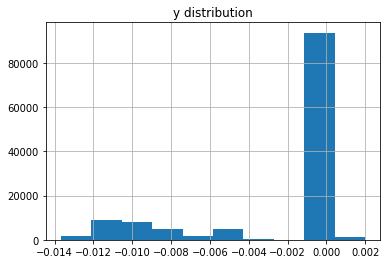

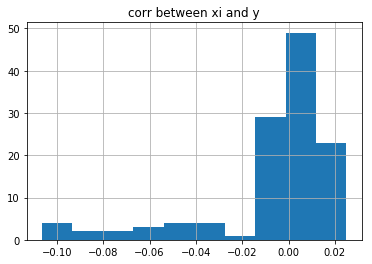

In [2]:
dl.Plot()

In [3]:
# xgboost model
model = xgb.XGBClassifier(max_depth=50, learning_rate=0.1, n_estimators=100, silent=False, objective='binary:logistic',
                          booster='gbtree', n_jobs=1, nthread=8, gamma=0, min_child_weight=1, max_delta_step=0,
                          subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1)
eval_set = [(x_train, y_train>0),(x_valid, y_valid>0)]
model.fit(x_train, y_train>0, eval_set=eval_set, verbose=True, eval_metric=['logloss', 'error'], early_stopping_rounds=5, )

y_onehot_pred = model.predict(x_test)
#model.get_booster().feature_names = dl.x_col

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


[0]	validation_0-logloss:0.632255	validation_0-error:0.088541	validation_1-logloss:0.673627	validation_1-error:0.369612
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.581335	validation_0-error:0.042371	validation_1-logloss:0.657255	validation_1-error:0.344895
[2]	validation_0-logloss:0.536342	validation_0-error:0.027869	validation_1-logloss:0.644568	validation_1-error:0.341307
[3]	validation_0-logloss:0.495738	validation_0-error:0.01926	validation_1-logloss:0.633307	validation_1-error:0.330094
[4]	validation_0-logloss:0.459449	validation_0-error:0.014738	validation_1-logloss:0.623698	validation_1-error:0.325609
[5]	validation_0-logloss:0.426663	validation_0-error:0.011636	validation_1-logloss:0.615194	validation_1-error:0.319729
[6]	validation_0-logloss:0.396985	validation_0-error:0.009294	validation_1-logloss:0.608665	validation_1-error:0.31649
[7

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


Confusion matrix, without normalization


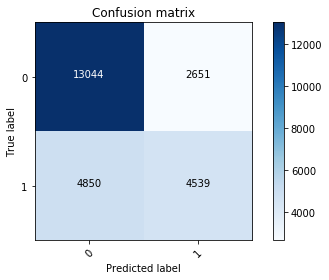

              precision    recall  f1-score   support

      class0       0.73      0.83      0.78     15695
      class1       0.63      0.48      0.55      9389

   micro avg       0.70      0.70      0.70     25084
   macro avg       0.68      0.66      0.66     25084
weighted avg       0.69      0.70      0.69     25084



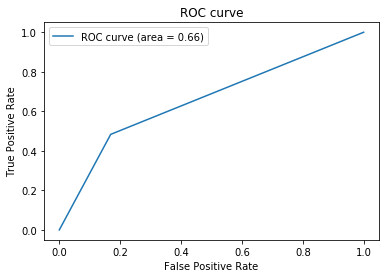

NameError: global name 'yticklabels' is not defined

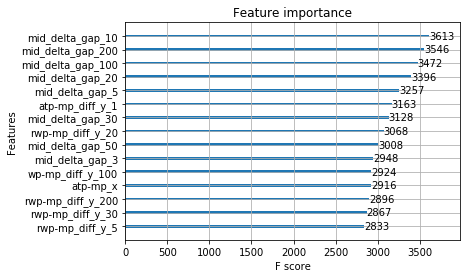

In [4]:
model.get_booster().feature_names = dl.x_col
ClsReport(model, y_test>0, y_onehot_pred, binary=True)